# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About Dataset
##### Dataset link: https://www.kaggle.com/joniarroba/noshowappointments

##### Context

>The dataset collects information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. This project is investigating Medical Appointment No Shows dataset which contains historical data for more than 110K appointments made accross different medical facilities in Brazil for more than 60k patients. A number of characteristics about the patient are:

##### Data Dictionary
>1. PatientId: Identification of a patient
>2. AppointmentID: Identification of each appointment
>3. Gender: (Male or Female)
>4. Scheduled Day: The day of the actuall appointment, when they have to visit the doctor.
>5. Appointment Day: The day someone called or registered the appointment, this is before appointment of course.
>6. Age: How old is the patient.
>7. Neighbourhood: Where the appointment takes place.
>8.Scholarship: (Yes or No)
>9. Hipertension: (Yes or No)
>10. Diabetes: (Yes or No)
>11. Alcoholism: (Yes or No)
>12. Handcap: (Yes or No)
>13. SMS_received: (1 or more messages sent to the patient)
>14. No-show: (True or False). - **Note**: No, means the patient showed up for the appointment and yes, means the patient didn"t show up.

### Questtion(s) for Analysis
>1. Distribution of Patient's Age.
>2. Is there a relationship between gender and showing up for appointments?
>3. Is there a relationship between Neighbourhood and showing up for appointments?
>4. Is there a relationship between alcoholism and showing for appointments?
>5. Does waiting time affect showing up for appointments?


In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


###### Importation of packages

In [2]:
# importation of the packages needed in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

##### Loading dataset
> The code below is used to read the dataset into the notebook, and check the first five rows to get an idea of dataset

In [3]:
df=pd.read_csv('No_Show_Appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Properties
> In this subsection, I will be checking the general properties (such as data shape(number of rows and columns), data types, null values, duplicate rows and summary statistics) of the dataset. 

In [4]:
# Checking number of rows and columns
print ('There are', df.shape[0], 'rows and ', df.shape[1], 'columns')

There are 110527 rows and  14 columns


In [5]:
#Checking the data types of each feature.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# Checking for missing values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [8]:
# Getting Summary statistics of Age
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

##### Observations
>After checking the general properties of the dataset, I observed that there are 110527 rows and  14 columns. Also, there are no missing values and duplicate rows. But looking at the summary statistics of age, I observed that the minimum age is negative which should not be so.

>This error will be corrected in the Data Cleaning subsection.

### Data Cleaning
> In this section, I will drop unnecessary features, drop Age with values less than 0, create new feature (waiting time) and replace the values of some features(such as Gender, Scholarship, Hipertension, Diabetes, Alcoholism)

##### Dropping Unnecessary feature

In [9]:
# Dropping unnecessary features
df.drop(columns=['PatientId','AppointmentID','Handcap', 'Hipertension','Diabetes'], inplace=True)

In [10]:
#To confirm if the features have been dropped
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,No


##### Dropping rows with negative age value

In [11]:
# Dropping rows with values less than 0
df.drop(df[df['Age']<0].index, inplace=True)

In [12]:
#To confirm 
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

##### Replacing (M with Male and F with Female) and (0 with No and 1 with Yes )

In [13]:
df['Gender'].replace(['F','M'], ['Female','Male'], inplace=True)
df['Scholarship'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['Alcoholism'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['SMS_received'].replace([0, 1], ['No', 'Yes'], inplace=True)

In [14]:
# To Confirm
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,SMS_received,No-show
0,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,No,No,No
1,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No
2,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No
3,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No
4,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No


##### Creating a new feature (Waiting Time)

In [15]:
# Converting the Schedule and Appointment Day feature to date type
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date

In [16]:
# To confirm 
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,SMS_received,No-show
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,No,No,No
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No


In [17]:
# Creating a new feature (Waiting time), which is the difference between Appointment Day and Scheduled Day
df['Waiting_time'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,SMS_received,No-show,Waiting_time
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,No,No,No,0
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,0
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,0
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,0
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,0


In [18]:
#Checking the summary Statistics
df['Waiting_time'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_time, dtype: float64

###### Observation
> I observed there are negative values for the waiting time.

>**Solution:** Drop the rows with negative values.

##### Dropping rows with negative waiting time.

In [19]:
# Dropping rows with negative waiting time
df.drop(df[df['Waiting_time'] < 0].index, inplace = True)

In [20]:
#To confirm
df['Waiting_time'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_time, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> This section discuss the research questions and statistical analysis.

#### Distribution of patient's that didn't show up for appointment

In [21]:
#Count of patient's that didn't show up of for appointment
df['No-show'].value_counts()

No     88207
Yes    22314
Name: No-show, dtype: int64

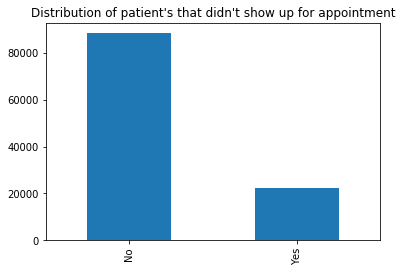

In [22]:
df['No-show'].value_counts().plot(kind='bar', title='Distribution of patient\'s that didn\'t show up for appointment');

###### Observation
> The bar chart above shows the distribution of patient's that didn't show up for appointment. It wa obsrved that a larger number ($88,207$) of patient's showed up for their appointment, compared to $22,314$ that didn't show up.

### Research Question 1: Distribution of Patient's Age

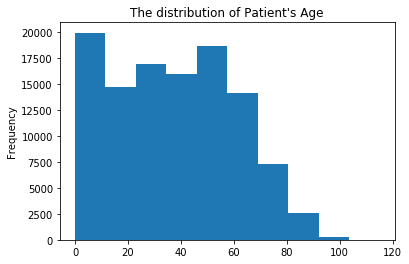

In [23]:
df['Age'].plot(kind='hist', title='The distribution of Patient\'s Age');

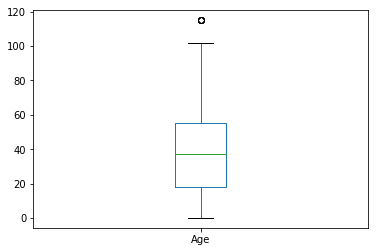

In [24]:
df['Age'].plot(kind='box');

### Research Question 2: Is there a relationship between Gender and showing up for appointments?
> To answer this question, The Pearson’s Chi-Square statistical hypothesis will be used, a test for independence between categorical variables. A Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables.

>$H_0$: There is no statistically significant relationship between gender and showing up for appointment.

>$H_a$:There is a statistically significant relationship between gender and showing up for appointment.

>Decision Rule: Reject null hypothesis ($H_0$), if p-value (0.05) < $\alpha$. Otherwise, do not reject $H_0$

In [25]:
#To create a contigency table
chisqt = pd.crosstab(df['Gender'], df['No-show'], margins = False)
chisqt

No-show,No,Yes
Gender,,
Female,57245,14591
Male,30962,7723


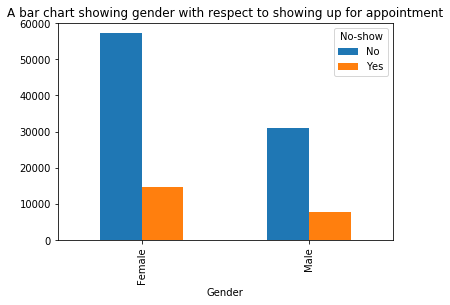

In [26]:
# Gender Distribution of showing up for appointment
chisqt.plot(kind='bar', title='A bar chart showing gender with respect to showing up for appointment');

In [27]:
# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

p-value: 0.172


##### Decision
> Since p-value (0.172) is not less than $\alpha=0.05$, we do not reject $H_0$.

##### Conclusion
>We say, there is no significant relationship between patient's gender and showing up for appointments.

### Research Question 3: Is there a relationship between Neighbourhood and Showing up for Appointments?
> To answer this question, The Pearson’s Chi-Square statistical hypothesis will be used, a test for independence between categorical variables. A Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables.

>$H_0$: There is no statistically significant relationship between neighbourhood and showing up for appointment.

>$H_a$:There is a statistically significant relationship between neighbourhood and showing up for appointment.

>Decision Rule: Reject null hypothesis ($H_0$), if p-value (0.05) < $\alpha$. Otherwise, do not reject $H_0$

In [28]:
#To create a contigency table
chisqt = pd.crosstab(df['Neighbourhood'], df['No-show'], margins = False)
chisqt.head()

No-show,No,Yes
Neighbourhood,,
AEROPORTO,7,1
ANDORINHAS,1741,521
ANTÔNIO HONÓRIO,221,50
ARIOVALDO FAVALESSA,220,62
BARRO VERMELHO,332,91


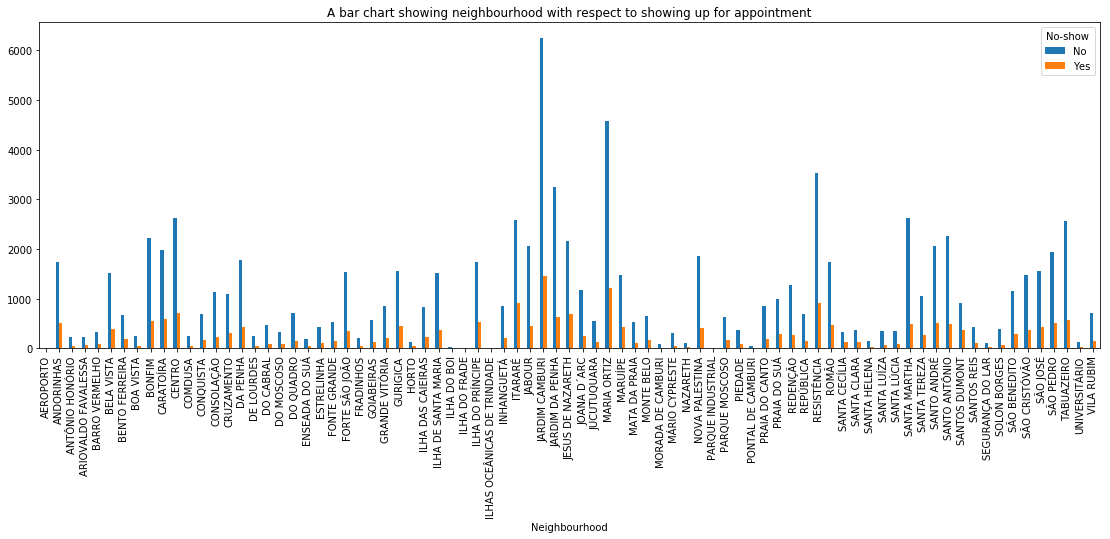

In [29]:
# Neighbourhood Distribution of showing up for appointment
chisqt.plot(kind='bar', title='A bar chart showing neighbourhood with respect to showing up for appointment', figsize=(19,6));

In [30]:
# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

p-value: 0.0


##### Decision
> Since p-value (0.0) is less than $\alpha=0.05$, we reject $H_0$.

##### Conclusion
>We say, there is a significant relationship between patient's neighbourhood and showing up for appointments.

### Research Question 4: Is there a relationship between Alcoholism and Showing up for Appointments?
> To answer this question, The Pearson’s Chi-Square statistical hypothesis will be used, a test for independence between categorical variables. A Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables.

>$H_0$: There is no statistically significant relationship between alcoholism and showing up for appointment.

>$H_a$:There is a statistically significant relationship between alcoholism and showing up for appointment.

>Decision Rule: Reject null hypothesis ($H_0$), if p-value (0.05) < $\alpha$. Otherwise, do not reject $H_0$

In [31]:
#To create a contigency table
chisqt = pd.crosstab(df['Alcoholism'], df['No-show'], margins = False)
chisqt.head()

No-show,No,Yes
Alcoholism,,
No,85524,21637
Yes,2683,677


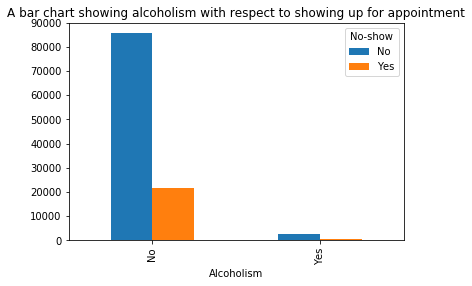

In [32]:
# Neighbourhood Distribution of showing up for appointment
chisqt.plot(kind='bar', title='A bar chart showing alcoholism with respect to showing up for appointment');

In [33]:
# run chi-square test for independence
chi2_contingency(chisqt)
print ('p-value:', chi2_contingency(chisqt)[1].round(4))

p-value: 0.9694


##### Decision
> Since p-value (0.9694) is not less than $\alpha=0.05$, we do no reject $H_0$.

##### Conclusion
>We say, there is no significant relationship between patient's alcoholism and showing up for appointments.

### Research Question 5: Does waiting time affect showing up for appointments?

In [34]:
df1=df.groupby('No-show')['Waiting_time'].mean().round()
df1

No-show
No      9.0
Yes    16.0
Name: Waiting_time, dtype: float64

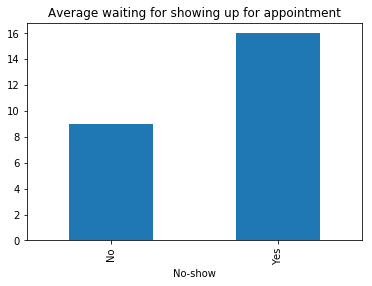

In [35]:
df1.plot(kind='bar', title='Average waiting for showing up for appointment');

##### Observation
>The bar chart above indcate that patients who attend appointments have a less waiting time than patients who don’t. Patient's that didn't show up have an average of 16 days of waiting before the appointment while patients that showed up have an average of 8 days of waiting before the appointment.

>Invariably, we can say waiting time affects whether a patient will show up for an appointment or not.

<a id='conclusions'></a>
## Conclusions

>1. The number of patients that attended medical appointments is greater than the number of patients that didn't show up for medical apppointment.

>2. The average age of a patient is 37 years and the highest age is 115 years.

>3. Gender and Alcoholism have no significant relationship with whether a patient will show up for a medical appointment or not.

>4. Neighbourhood and waiting time affects whether a patient will show up for a medical appointment or not.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])